In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [298]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [299]:
import sys
sys.path.append('..')
from dataset import batcher

In [300]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [301]:
# Load model
experiments = ['imagery_sample_cnn_regression_raw']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [302]:
# Get test split
test_batcher = batcher.Batcher(bucket=False, shuffle=False, split='test', repeat=1, batch_size=652).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 3)


In [303]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
            loss=LOSS,
            optimizer=OPT,
            metrics=METRICS,
        )

y_preds = trained_model.predict_on_batch(x_true)
print(y_preds)

2023-01-30 21:34:42.087830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[-2.3918693]
 [-2.440379 ]
 [-2.305646 ]
 [-2.2215278]
 [-2.375779 ]
 [-2.32121  ]
 [-2.2164803]
 [-2.25125  ]
 [-2.4703746]
 [-2.3275712]
 [-2.3188374]
 [-2.4087594]
 [-2.6461985]
 [-2.1081307]
 [-2.3033483]
 [-1.8727045]
 [-2.3383372]
 [-2.5731502]
 [-2.515509 ]
 [-2.326204 ]
 [-2.1182187]
 [-2.1306436]
 [-2.3918693]
 [-2.3947732]
 [-1.9287444]
 [-2.4946735]
 [-2.401652 ]
 [-2.4655864]
 [-2.3958871]
 [-2.4550288]
 [-2.9075916]
 [-2.1375268]
 [-2.383588 ]
 [-2.0468876]
 [-2.2129312]
 [-1.5463903]
 [-2.286733 ]
 [-2.2187471]
 [-2.1872919]
 [-2.0875742]
 [-2.0843613]
 [-2.176937 ]
 [-2.3463175]
 [-2.421747 ]
 [-2.4840453]
 [-1.9127688]
 [-2.065429 ]
 [-2.2855458]
 [-2.43728  ]
 [-2.5584676]
 [-1.6071694]
 [-2.4120429]
 [-2.1800642]
 [-2.0317323]
 [-1.7370275]
 [-2.2686608]
 [-2.290958 ]
 [-2.485603 ]
 [-2.1532245]
 [-2.234372 ]
 [-2.3160365]
 [-2.3488925]
 [-2.1964223]
 [-1.9643161]
 [-2.1854043]
 [-2.446764 ]
 [-2.1375268]
 [-2.1872919]
 [-3.1504724]
 [-2.210168 ]
 [-2.5568771]
 [-2.2

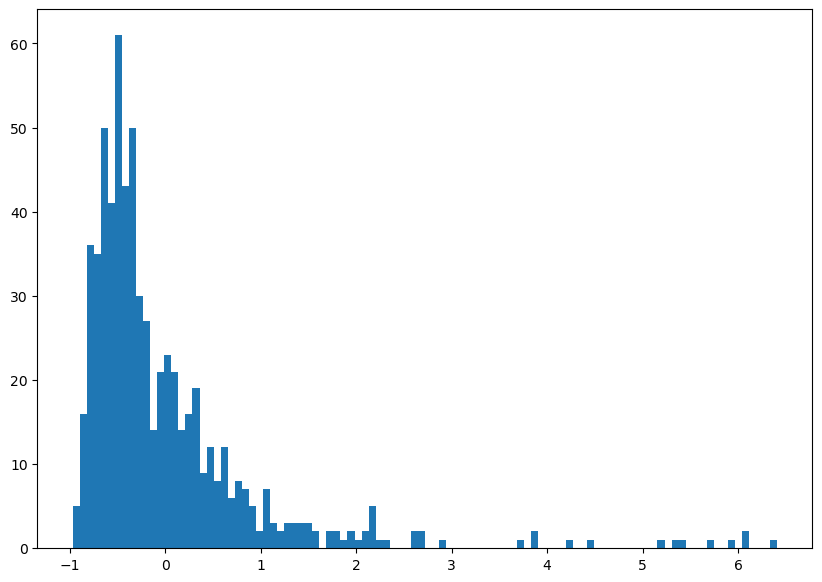

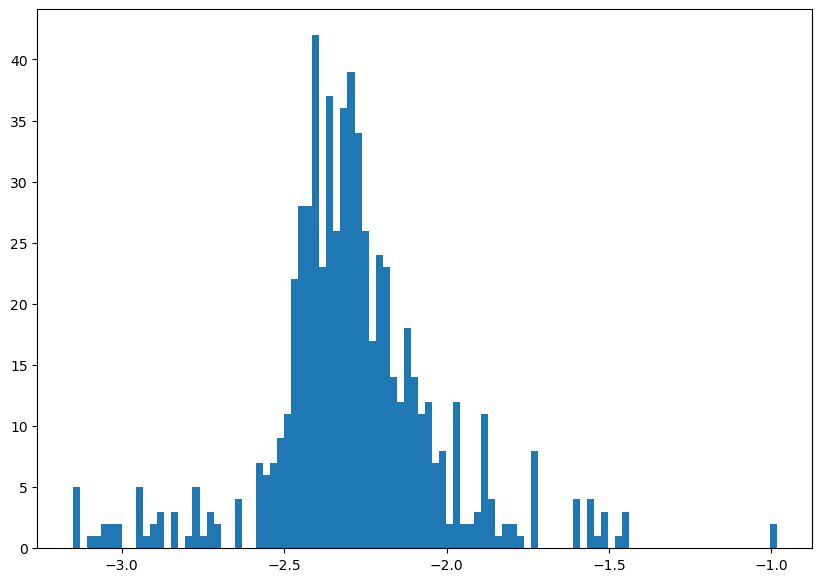

In [304]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()


r2 = pearsonr(y_true, y_preds)[0]

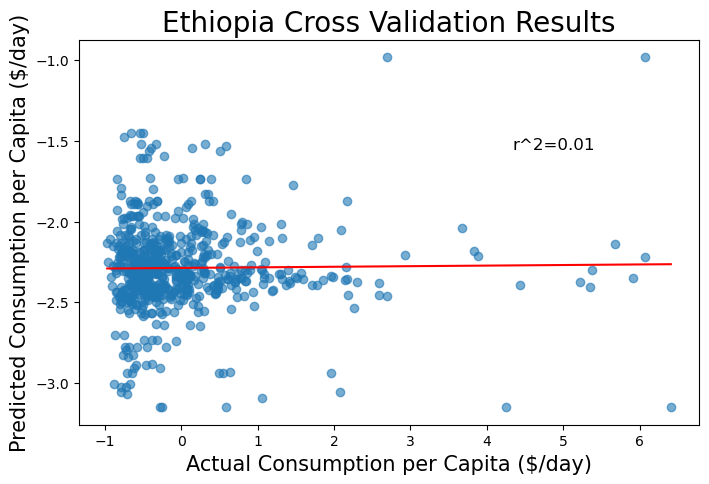

In [307]:
# Plot predictions
country = 'Ethiopia'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([np.min(y_true), 10])
plt.show()